In [1]:
# 한글 폰트를 설치합니다.

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 27s (385 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and direc

In [2]:
# URL에 있는 파일을 다운로드 받습니다.

import urllib.request

urllib.request.urlretrieve(
    "https://raw.githubusercontent.com/tykimos/tykimos.github.io/master/warehouse/dataset/tarr_train.txt",
    filename="tarr_train.txt",
)

('tarr_train.txt', <http.client.HTTPMessage at 0x7a4c7f0aaaa0>)

In [3]:
# 정형데이터를 분석하기 위해서 pandas 패키지를 이용합니다.

import pandas as pd

# Load the train.tsv file
train_file_path = 'tarr_train.txt'

# 데이터프레임 형태로 정보를 가지고 옵니다.
train_data = pd.read_csv(train_file_path, sep='\t')

# Display the first few rows of the dataset
train_data.head()

,id,comment,label
0,1,여기 음식은 언제 와도 실망시키지 않아요. 최고!,1
1,2,여기 라멘 진짜 ㄹㅇ 맛있어요. 국물이 진하고 면도 쫄깃해서 너무 좋았습니다.,1
2,3,"진짜 깔끔하고, 맛도 좋았어요. 추천합니다!",1
3,4,왜 이렇게 유명한지 모르겠음ㅋㅋ ㄹㅈㄷ 맛없음,0
4,5,인생 타르트를 여기서 만났어요❤️ 달지 않고 고소해서 정말 추천합니다!,1


In [4]:
# Calculate the length of each comment
train_data['comment_length'] = train_data['comment'].apply(len)

# Basic statistics for comment length
comment_length_statistics = train_data['comment_length'].describe()

comment_length_statistics

count    300.000000
mean      31.236667
std       10.682120
min        5.000000
25%       25.000000
50%       30.000000
75%       35.000000
max       92.000000
Name: comment_length, dtype: float64

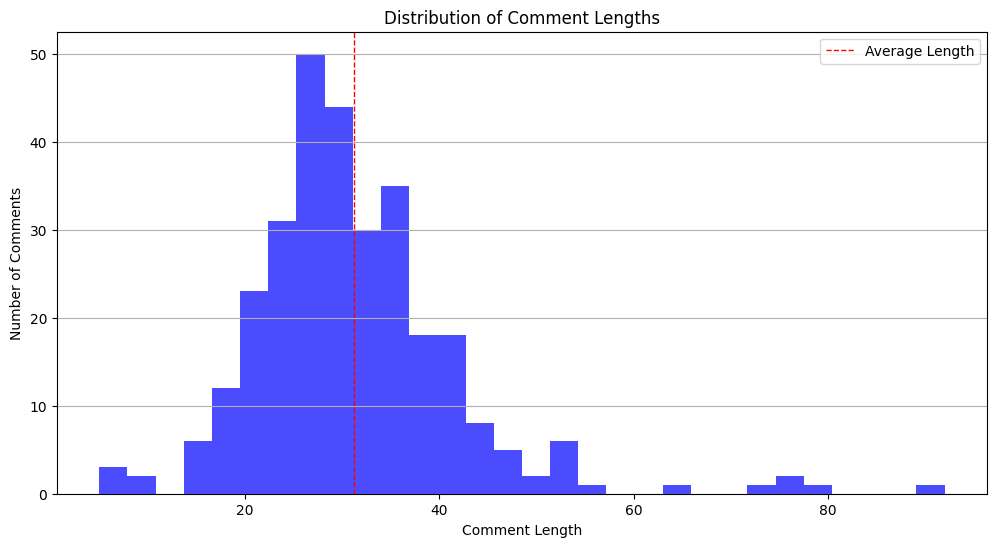

In [5]:
# matplotlib : 데이터를 시각화하는데 많이 사용되는 패키지입니다.

import matplotlib.pyplot as plt

# Plotting the distribution of comment lengths
plt.figure(figsize=(12, 6))
plt.hist(train_data['comment_length'], bins=30, color='blue', alpha=0.7)
plt.axvline(train_data['comment_length'].mean(), color='red', linestyle='dashed', linewidth=1, label='Average Length')
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(axis='y')
plt.show()


In [6]:
# Basic statistics and distribution of the 'label' column
label_count = train_data['label'].value_counts()
print(label_count)

label_distribution = train_data['label'].value_counts(normalize=True)
print(label_distribution)

label
1    162
0    138
Name: count, dtype: int64
label
1    0.54
0    0.46
Name: proportion, dtype: float64


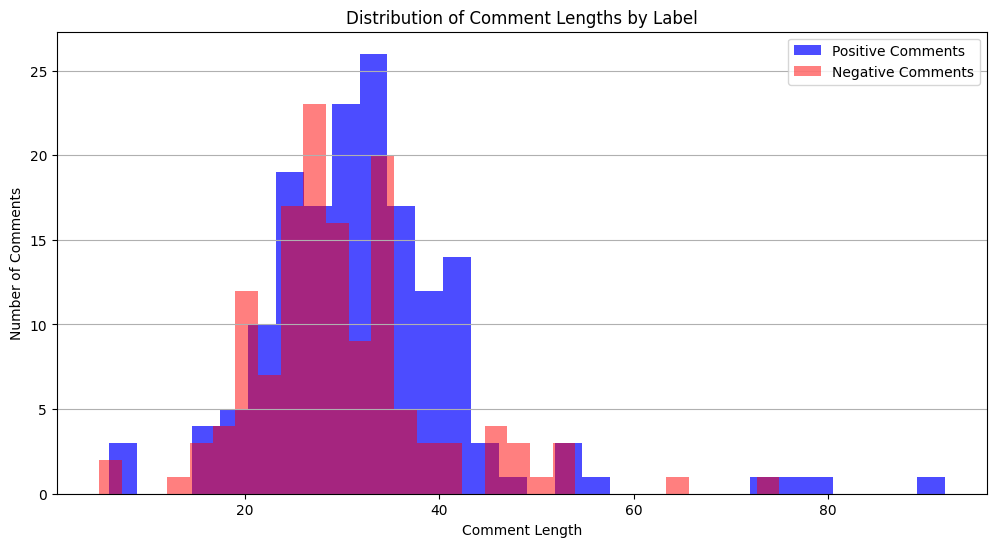

In [7]:
# Plotting distribution of comment lengths by label
plt.figure(figsize=(12, 6))
plt.hist(train_data[train_data['label'] == 1]['comment_length'], bins=30, color='blue', alpha=0.7, label='Positive Comments')
plt.hist(train_data[train_data['label'] == 0]['comment_length'], bins=30, color='red', alpha=0.5, label='Negative Comments')
plt.title('Distribution of Comment Lengths by Label')
plt.xlabel('Comment Length')
plt.ylabel('Number of Comments')
plt.legend()
plt.grid(axis='y')
plt.show()

In [8]:
from collections import Counter
import re

def get_word_frequencies(texts):
    """Returns the word frequencies from a list of texts."""
    words = []
    for text in texts:
        # Tokenizing by space after removing punctuations
        words.extend(re.findall(r'\b\w+\b', text))

    # Counting word frequencies
    return Counter(words)

# Getting word frequencies for positive and negative comments
positive_comments = train_data[train_data['label'] == 1]['comment']
negative_comments = train_data[train_data['label'] == 0]['comment']

positive_word_freq = get_word_frequencies(positive_comments)
negative_word_freq = get_word_frequencies(negative_comments)

# Getting top 10 frequent words for positive and negative comments
top_positive_words = positive_word_freq.most_common(10)
top_negative_words = negative_word_freq.most_common(10)

top_positive_words, top_negative_words

([('여기', 31),
  ('진짜', 23),
  ('너무', 23),
  ('좋아요', 16),
  ('정말', 14),
  ('이런', 14),
  ('같아요', 11),
  ('맛있어요', 9),
  ('좋았어요', 8),
  ('또', 8)],
 [('너무', 42),
  ('좀', 23),
  ('안', 20),
  ('같아요', 14),
  ('음식이', 13),
  ('것', 13),
  ('올', 11),
  ('여기', 10),
  ('그냥', 10),
  ('왔는데', 9)])

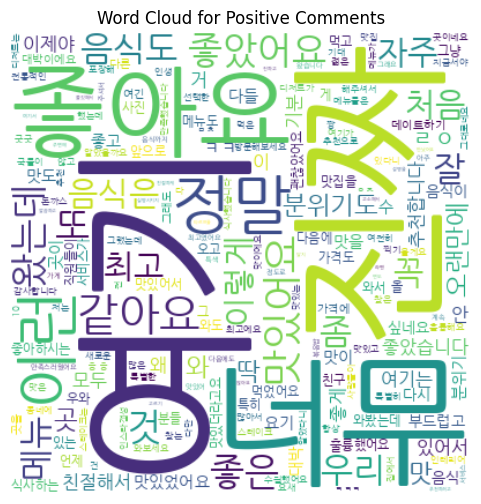

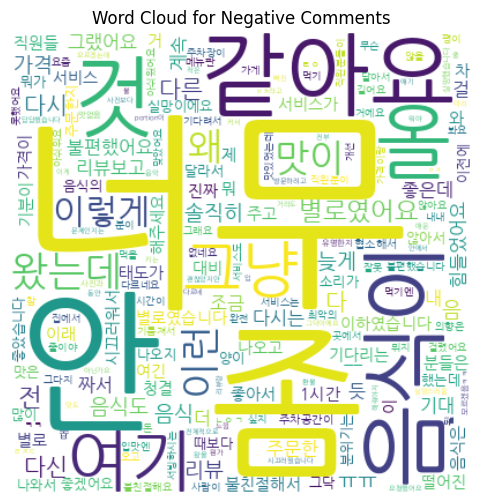

In [9]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative comments
def generate_wordcloud(word_freq, title):
    wc = WordCloud(width=400, height=400, background_color='white', font_path='NanumGothic.ttf').generate_from_frequencies(word_freq)
    plt.figure(figsize=(6, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Displaying word clouds
generate_wordcloud(positive_word_freq, 'Word Cloud for Positive Comments')
generate_wordcloud(negative_word_freq, 'Word Cloud for Negative Comments')
